<a href="https://colab.research.google.com/github/Rohsha/Datascience/blob/master/sberbank-russian-housing-market(dataset2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#second data set
import os

os.environ['KAGGLE_USERNAME'] = "rohinisubramaniam" # username from the json file

os.environ['KAGGLE_KEY'] = "22aa1922fcaa2f5e066336187cf441b4" # key from the json file

!kaggle competitions download -c sberbank-russian-housing-market


  0% 0.00/4.46M [00:00<?, ?B/s]
100% 4.46M/4.46M [00:00<00:00, 73.2MB/s]
 53% 9.00M/17.1M [00:00<00:00, 13.4MB/s]
100% 17.1M/17.1M [00:00<00:00, 25.0MB/s]
  0% 0.00/18.6k [00:00<?, ?B/s]
100% 18.6k/18.6k [00:00<00:00, 19.1MB/s]
  0% 0.00/25.4k [00:00<?, ?B/s]
100% 25.4k/25.4k [00:00<00:00, 24.9MB/s]
  0% 0.00/66.5k [00:00<?, ?B/s]
100% 66.5k/66.5k [00:00<00:00, 57.1MB/s]


In [0]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import os
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from scipy import stats

In [0]:
!unzip \*.zip


Archive:  test.csv.zip
  inflating: test.csv                
   creating: __MACOSX/
  inflating: __MACOSX/._test.csv     

Archive:  macro.csv.zip
  inflating: macro.csv               

Archive:  sample_submission.csv.zip
  inflating: sample_submission.csv   

Archive:  train.csv.zip
  inflating: train.csv               
  inflating: __MACOSX/._train.csv    

4 archives were successfully processed.


In [0]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print(len(test))
print(len(train))
print(len(train.columns))
print(len(test.columns))


7662
30471
292
291


In [0]:
train.isna().sum()
train.columns[train.isnull().any()].tolist()  # to get a list instead of an Index object


['life_sq',
 'floor',
 'max_floor',
 'material',
 'build_year',
 'num_room',
 'kitch_sq',
 'state',
 'preschool_quota',
 'school_quota',
 'hospital_beds_raion',
 'raion_build_count_with_material_info',
 'build_count_block',
 'build_count_wood',
 'build_count_frame',
 'build_count_brick',
 'build_count_monolith',
 'build_count_panel',
 'build_count_foam',
 'build_count_slag',
 'build_count_mix',
 'raion_build_count_with_builddate_info',
 'build_count_before_1920',
 'build_count_1921-1945',
 'build_count_1946-1970',
 'build_count_1971-1995',
 'build_count_after_1995',
 'metro_min_walk',
 'metro_km_walk',
 'railroad_station_walk_km',
 'railroad_station_walk_min',
 'ID_railroad_station_walk',
 'cafe_sum_500_min_price_avg',
 'cafe_sum_500_max_price_avg',
 'cafe_avg_price_500',
 'cafe_sum_1000_min_price_avg',
 'cafe_sum_1000_max_price_avg',
 'cafe_avg_price_1000',
 'cafe_sum_1500_min_price_avg',
 'cafe_sum_1500_max_price_avg',
 'cafe_avg_price_1500',
 'cafe_sum_2000_min_price_avg',
 'cafe_su

In [0]:
test.isna().sum()
test.columns[test.isnull().any()].tolist()  # to get a list instead of an Index object


['life_sq',
 'build_year',
 'state',
 'product_type',
 'preschool_quota',
 'school_quota',
 'hospital_beds_raion',
 'raion_build_count_with_material_info',
 'build_count_block',
 'build_count_wood',
 'build_count_frame',
 'build_count_brick',
 'build_count_monolith',
 'build_count_panel',
 'build_count_foam',
 'build_count_slag',
 'build_count_mix',
 'raion_build_count_with_builddate_info',
 'build_count_before_1920',
 'build_count_1921-1945',
 'build_count_1946-1970',
 'build_count_1971-1995',
 'build_count_after_1995',
 'metro_min_walk',
 'metro_km_walk',
 'railroad_station_walk_km',
 'railroad_station_walk_min',
 'ID_railroad_station_walk',
 'cafe_sum_500_min_price_avg',
 'cafe_sum_500_max_price_avg',
 'cafe_avg_price_500',
 'cafe_sum_1000_min_price_avg',
 'cafe_sum_1000_max_price_avg',
 'cafe_avg_price_1000',
 'cafe_sum_1500_min_price_avg',
 'cafe_sum_1500_max_price_avg',
 'cafe_avg_price_1500',
 'green_part_2000',
 'cafe_sum_2000_min_price_avg',
 'cafe_sum_2000_max_price_avg',
 'c

In [0]:
for i in train.columns:
    if train[i].dtype == 'object':
      train[i] = train[i].fillna(train[i].mode().iloc[0])
    if (train[i].dtype == 'int' or train[i].dtype == 'float'):
      train[i] = train[i].fillna(np.mean(train[i]))


In [0]:
for i in test.columns:
    if test[i].dtype == 'object':
      test[i] = test[i].fillna(test[i].mode().iloc[0])
    if (test[i].dtype == 'int' or test[i].dtype == 'float'):
      test[i] = test[i].fillna(np.mean(test[i]))


In [0]:
number = LabelEncoder()
for i in train.columns:
    if (train[i].dtype == 'object'):
      train[i] = number.fit_transform(train[i].astype('str'))
      train[i] = train[i].astype('object')



In [0]:
for i in test.columns:
    if (test[i].dtype == 'object'):
      test[i] = number.fit_transform(test[i].astype('str'))
      test[i] = test[i].astype('object')



In [0]:
train['sour'] = 0
test['sour'] = 1
training = train.drop('price_doc',axis=1) #droping target variable



In [0]:
train_rand = training.sample(6672, random_state=12)
test_rand = test.sample(6000, random_state=11)



In [0]:
concat = training.append(test_rand)
y = concat['sour']
concat.drop('sour',axis=1,inplace=True)


In [0]:
model = RandomForestClassifier(n_estimators = 50, max_depth = 5,min_samples_leaf = 5)
drop_list = []
for i in concat.columns:
    score = cross_val_score(model,pd.DataFrame(concat[i]),y,cv=2,scoring='roc_auc')
    if (np.mean(score) > 0.8):
        drop_list.append(i)
        print(i,np.mean(score))



id 0.8750902527075812
timestamp 0.87009385665529
life_sq 0.8122976336977504
hospital_beds_raion 0.8821282532454628
cafe_sum_500_min_price_avg 0.8366837320857025
cafe_sum_500_max_price_avg 0.833971673398588
cafe_avg_price_500 0.8363793385350433


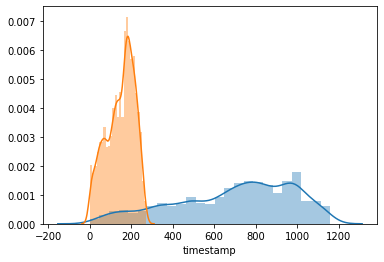

In [0]:
import seaborn as sns

sns.distplot(train_rand['timestamp'])
sns.distplot(test_rand['timestamp'])


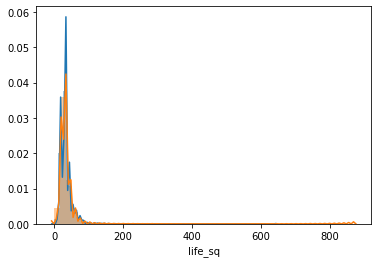

In [0]:
sns.distplot(train_rand['life_sq'])
sns.distplot(test_rand['life_sq'])

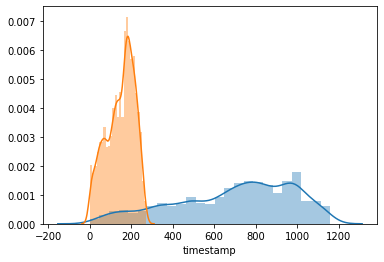

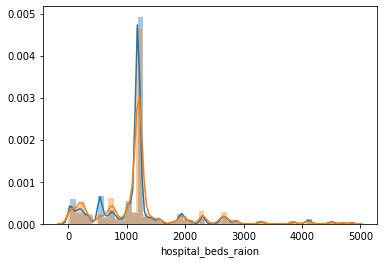

In [0]:
sns.distplot(train_rand['hospital_beds_raion'])
sns.distplot(test_rand['hospital_beds_raion'])

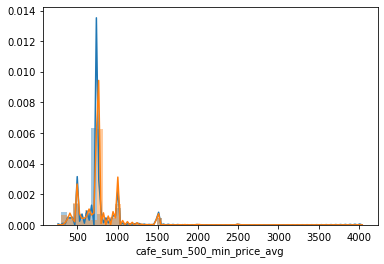

In [0]:
sns.distplot(train_rand['cafe_sum_500_min_price_avg'])
sns.distplot(test_rand['cafe_sum_500_min_price_avg'])

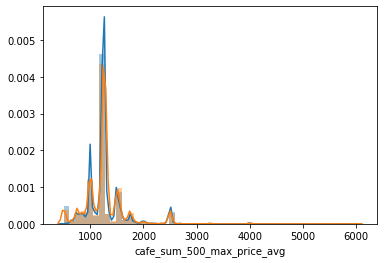

In [0]:
sns.distplot(train_rand['cafe_sum_500_max_price_avg'])
sns.distplot(test_rand['cafe_sum_500_max_price_avg'])

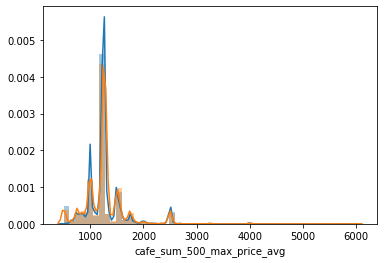

In [0]:
sns.distplot(train_rand['cafe_sum_500_max_price_avg'])
sns.distplot(test_rand['cafe_sum_500_max_price_avg'])

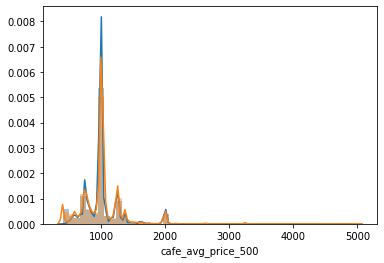

In [0]:
sns.distplot(train_rand['cafe_avg_price_500'])
sns.distplot(test_rand['cafe_avg_price_500'])

In [0]:
def boostrap_mean(sample,n_iterations):
  import random 
  
  data_mean11=np.array([])
  for i in range(n_iterations):
    sample1=np.random.choice(sample,size=5)
    data_mean1=np.mean(sample1)
    data_mean11=np.append(data_mean11,data_mean1)
  data_mean=np.mean(data_mean11)  
  
  lower=np.percentile(data_mean11,5)
  upper=np.percentile(data_mean11,95)
  return data_mean,lower,upper

(0, 100000)

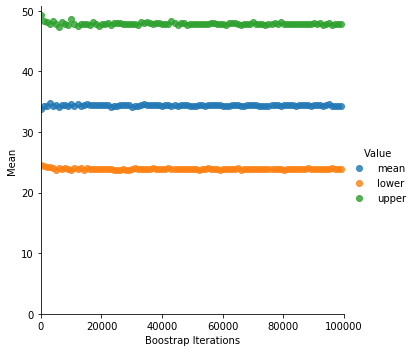

In [0]:
boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean(train['life_sq'], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

(0, 100000)

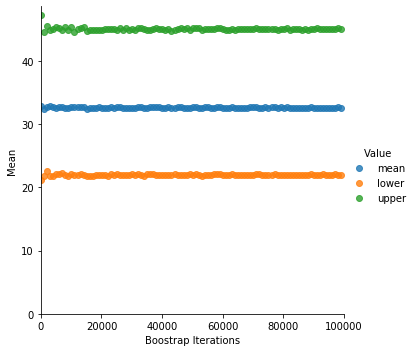

In [0]:
boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean(test['life_sq'], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

In [0]:
def boostrap_mean1(sample,n_iterations):
  import random 
  
  data_mean11=np.array([])
  for i in range(n_iterations):
    sample1=np.random.choice(sample,size=5)
    data_mean1=np.mean(sample1)
    data_mean11=np.append(data_mean11,data_mean1)
 
  
  lower=np.percentile(data_mean11,5)
  upper=np.percentile(data_mean11,95)
  data_mean1=data_mean11[(data_mean11>lower) & (data_mean11<upper)]  
  data_mean=np.mean(data_mean1) 
  print(data_mean)
 
  return data_mean

In [0]:
mean1=boostrap_mean1(train['life_sq'], 10000 )

33.63395438822944


In [0]:
mean2=boostrap_mean1(test['life_sq'],10000 )


32.06796696539105


In [0]:
T_obs=mean1-mean2
print(T_obs)


1.5659874228383899


In [0]:
data1=train['life_sq']
data2=test['life_sq']
new_data=np.concatenate([data1,data2])
count=0
for i in range(20000):
  dat1=np.random.choice(new_data,7000)
  dat2=np.random.choice(new_data,6000)
  mean_dat1=np.mean(dat1)
  mean_dat2=np.mean(dat2)
  T_perm= mean_dat2-mean_dat1
  if T_perm>T_obs:
    count=count+1
p_value=count/20000
print(p_value)


0.0267
